# Heart Disease Prediction

### In this machine learning project,I will be using Machine Learning to make predictions 
### on whether a person is suffering from Heart Disease or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import skew

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.feature_selection import chi2           
from sklearn.feature_selection import f_regression  
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking Missing Values

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Umderstanding and Visualise the data

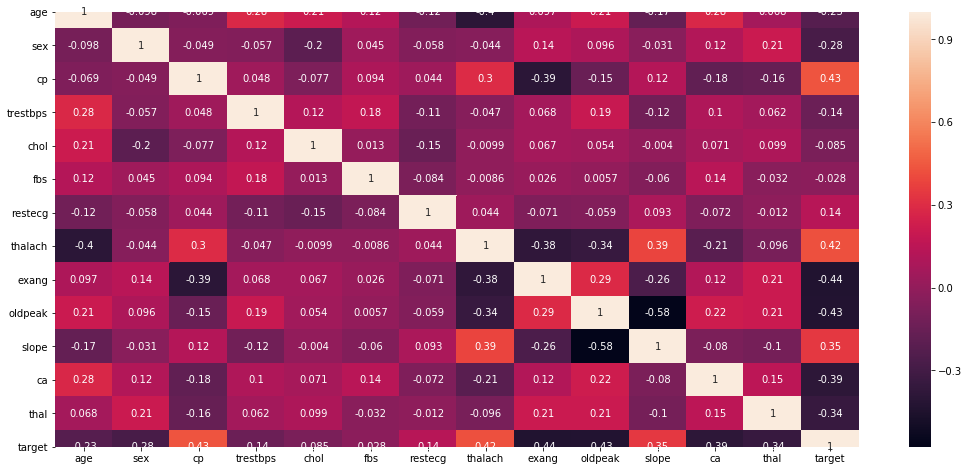

In [6]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

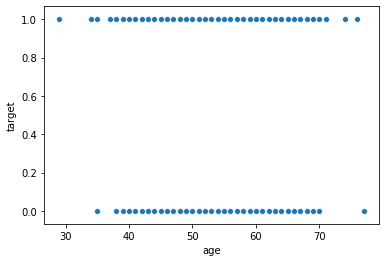

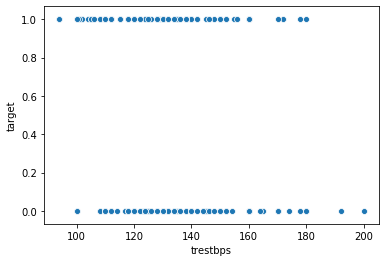

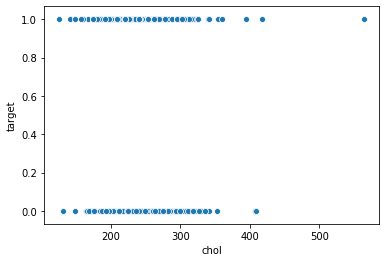

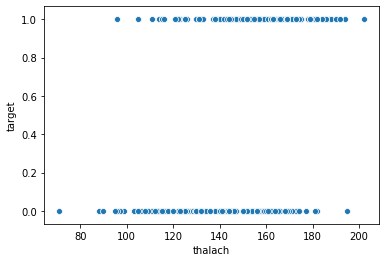

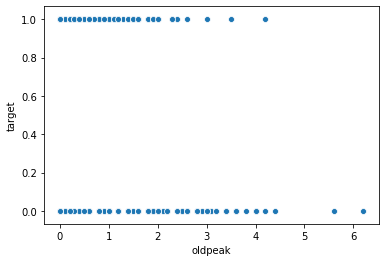

In [7]:
col=["age","trestbps","chol","thalach","oldpeak"]
for c in col:
    plt.figure()
    sns.scatterplot(data=df,y="target",x=c)
    plt.show()
    

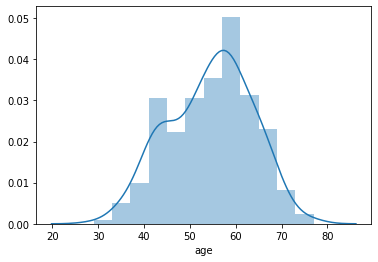

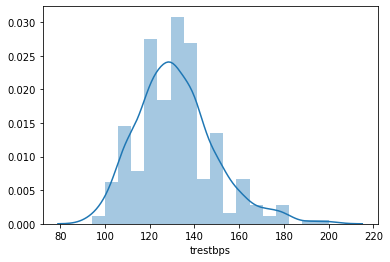

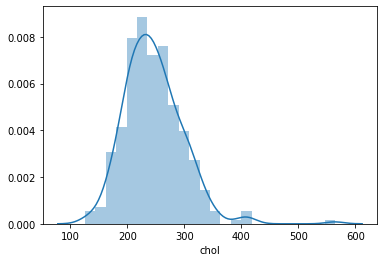

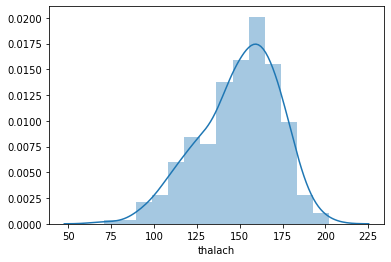

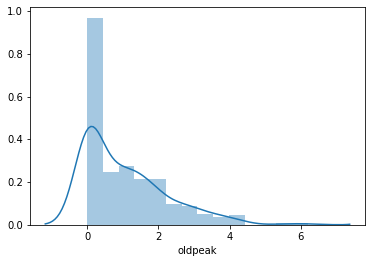

In [8]:
for c in col:
    plt.figure()
    sns.distplot(df[c])
    plt.show()

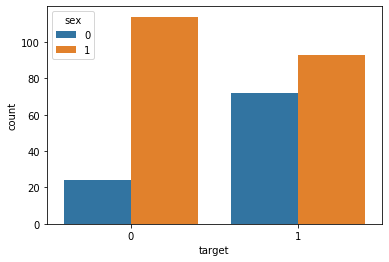

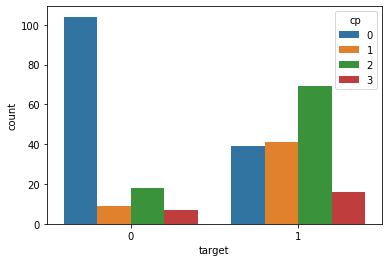

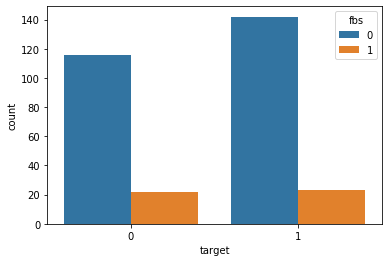

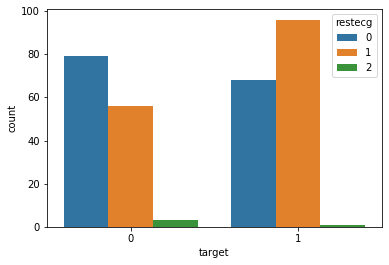

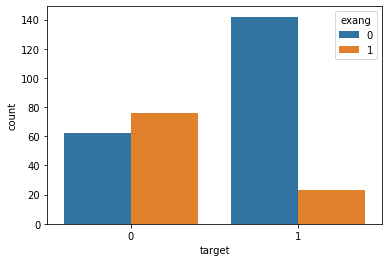

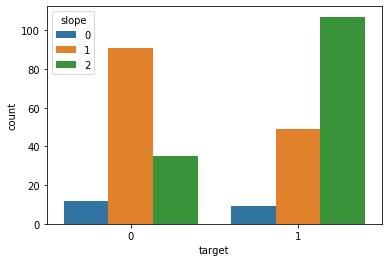

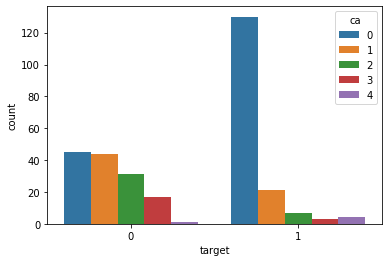

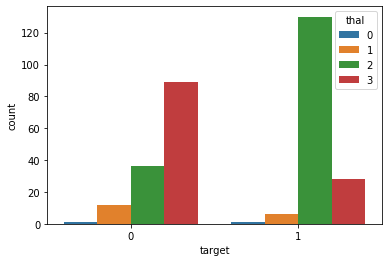

In [9]:
cat=['sex','cp','fbs','restecg','exang','slope','ca','thal']
for c in cat:
    plt.figure()
    sns.countplot(data=df,x="target",hue=c)
    plt.show()

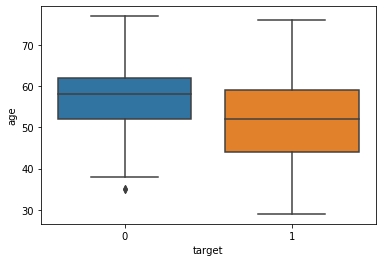

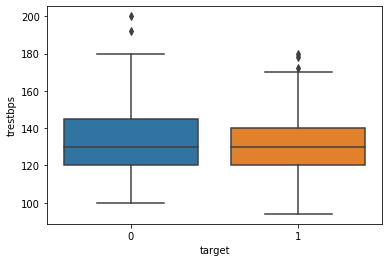

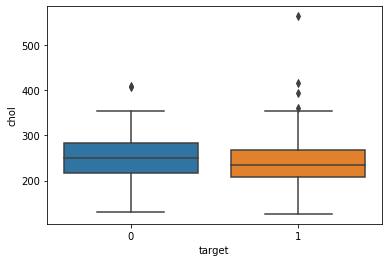

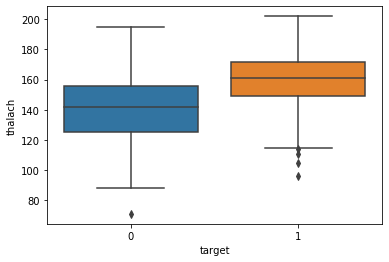

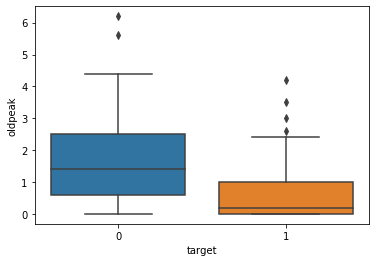

In [10]:
for c in col:
    plt.figure()
    sns.boxplot(data=df,x="target",y=c)
    plt.show()

### Scaling the continous features

In [11]:
for c in col:
    ss=StandardScaler()
    df[c]=ss.fit_transform(df[[c]])
    

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [13]:
X=df.drop("target",axis=1)
y=df["target"]

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Train Test split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

### Logistic Regression

In [17]:
lr=LogisticRegression(random_state=1)
classify(lr)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Decision Tree

In [18]:
dt1=DecisionTreeClassifier(random_state=1)
classify(dt1)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.81      0.70      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [19]:
dt1.feature_importances_

array([0.10617053, 0.01713481, 0.31774899, 0.08505171, 0.09016647,
       0.        , 0.0142537 , 0.0457325 , 0.10469932, 0.06844208,
       0.        , 0.11616361, 0.03443628])

In [20]:
dt2=DecisionTreeClassifier(max_depth=5,random_state=1)
classify(dt2)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        41
           1       0.75      0.78      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [21]:
def feature_select(criterion,count,model):
    test=SelectKBest(score_func=criterion,k=count)
    X_train_new=test.fit_transform(X_train,y_train)
    X_test_new=test.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred=model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(test.get_support())
    return model

In [22]:
def pca(count,model):
    pc=PCA(n_components=count,random_state=1)
    X_train_new=pc.fit_transform(X_train,y_train)
    X_test_new=pc.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred=model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(pc.components_)
    return model

### Feature selection on Logistic Regression

In [23]:
feature_select(f_regression,10,lr)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[ True  True  True False False False  True  True  True  True  True  True
  True]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pca(8,lr)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91

[[ 0.46240979  0.02013762 -0.29608588  0.21568657  0.15581101  0.02732515
  -0.06298048 -0.53012455  0.16206081  0.37726105 -0.19400071  0.35215146
   0.1064203 ]
 [ 0.28546488 -0.04597501  0.59645302  0.66729659  0.18574629  0.06438944
  -0.04654894  0.23398113 -0.0953561   0.08387958  0.01309484 -0.05469861
  -0.02239451]
 [-0.25100983  0.02234136  0.07375069  0.11177352 -0.32834163 -0.03077953
   0.0528209  -0.19984634  0.08741132  0.53835999 -0.31567577 -0.60804008
  -0.01555917]
 [ 0.33687552  0.00800462  0.5066836  -0.30474812 -0.59366242  0.01393901
   0.07347617 -0.32461329 -0.09095666 -0.10427215  0.04132569  0.17650223
  -0.14643284]
 [-0.4637723   0.1558

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Linear SVM

In [25]:
lsvc=LinearSVC(random_state=1)
classify(lsvc)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

### Linear svm with soft margin

In [26]:
lsvc_soft=LinearSVC(C=0.7,random_state=1)
classify(lsvc_soft)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [27]:
#lsvc_poly=SVC(kernel="poly",random_state=1)
#classify(lsvc_poly)

### Radial bias svm

In [28]:
svc_rbf=SVC(C=0.5,kernel="rbf",random_state=1)
classify(svc_rbf)

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

## Feature Selection on svm

In [29]:
feature_select(f_regression,8,lsvc)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[False  True  True False False False False  True  True  True  True  True
  True]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [30]:
feature_select(f_regression,8,lsvc_soft)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[False  True  True False False False False  True  True  True  True  True
  True]


LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [31]:
feature_select(f_regression,8,svc_rbf)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        41
           1       0.79      0.90      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.82      0.81      0.81        91

[False  True  True False False False False  True  True  True  True  True
  True]


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
pca(8,lsvc)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91

[[ 0.46240979  0.02013762 -0.29608588  0.21568657  0.15581101  0.02732515
  -0.06298048 -0.53012455  0.16206081  0.37726105 -0.19400071  0.35215146
   0.1064203 ]
 [ 0.28546488 -0.04597501  0.59645302  0.66729659  0.18574629  0.06438944
  -0.04654894  0.23398113 -0.0953561   0.08387958  0.01309484 -0.05469861
  -0.02239451]
 [-0.25100983  0.02234136  0.07375069  0.11177352 -0.32834163 -0.03077953
   0.0528209  -0.19984634  0.08741132  0.53835999 -0.31567577 -0.60804008
  -0.01555917]
 [ 0.33687552  0.00800462  0.5066836  -0.30474812 -0.59366242  0.01393901
   0.07347617 -0.32461329 -0.09095666 -0.10427215  0.04132569  0.17650223
  -0.14643284]
 [-0.4637723   0.1558

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [33]:
pca(11,svc_rbf)

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91

[[ 0.46240979  0.02013762 -0.29608588  0.21568657  0.15581101  0.02732515
  -0.06298048 -0.53012455  0.16206081  0.37726105 -0.19400071  0.35215146
   0.1064203 ]
 [ 0.28546488 -0.04597501  0.59645302  0.66729659  0.18574629  0.06438944
  -0.04654894  0.23398113 -0.0953561   0.08387958  0.01309484 -0.05469861
  -0.02239451]
 [-0.25100983  0.02234136  0.07375069  0.11177352 -0.32834163 -0.03077953
   0.0528209  -0.19984634  0.08741132  0.53835999 -0.31567577 -0.60804008
  -0.01555917]
 [ 0.33687552  0.00800462  0.5066836  -0.30474812 -0.59366242  0.01393901
   0.07347617 -0.32461329 -0.09095666 -0.10427215  0.04132569  0.17650223
  -0.14643284]
 [-0.4637723   0.1558

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

### Naive Aggregation

In [34]:
model_list=[('lr',lr),('lsvc',lsvc),('svc_rbf',svc_rbf)]

In [35]:
vc1=VotingClassifier(estimators=model_list)

In [36]:
classify(vc1)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('lsvc',
                              LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_s...
                                        multi_class='ovr', penalty='l2',
                               

### Random Forest

In [37]:
rfc=RandomForestClassifier(n_estimators=100,max_features=6,random_state=1)
classify(rfc)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        41
           1       0.75      0.76      0.75        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### Bagging 

In [38]:
bc1=BaggingClassifier(LogisticRegression(random_state=1),n_estimators=20,max_samples=100,random_state=1)

In [39]:
classify(bc1)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=1,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=1, verbos

In [40]:
bc2=BaggingClassifier(SVC(kernel="rbf",random_state=1),n_estimators=20,max_samples=100,random_state=1)

In [41]:
classify(bc2)

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='rbf', max_iter=-1,
                                     probability=False, random_state=1,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=1, verbose=0, warm_start=False)

### Pasting

In [42]:
bc3=BaggingClassifier(LogisticRegression(random_state=1),n_estimators=20,max_samples=100,random_state=1,bootstrap=False)

In [43]:
classify(bc3)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        41
           1       0.78      0.84      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=1,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=1, verbo

In [44]:
bc4=BaggingClassifier(SVC(kernel="rbf",random_state=1),n_estimators=20,max_samples=100,random_state=1,bootstrap=False)

In [45]:
classify(bc4)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='rbf', max_iter=-1,
                                     probability=False, random_state=1,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=1, verbose=0, warm_start=False)

### Stacking

In [46]:
model_list=[lr,lsvc,svc_rbf]

In [47]:
lr2=LogisticRegression(random_state=1)


In [48]:
stc=StackingClassifier(classifiers=model_list,meta_classifier=lr2)

In [49]:
classify(stc)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=1,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                LinearSVC(C=1.0, class_weight=None, dual=True,
                                          fit_intercept=True,
                             

## Boosting Techniques

### Adaptive Boosting

In [50]:
ad=AdaBoostClassifier(n_estimators=100)
classify(ad)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

### Gradient Boosting Classifier

In [51]:
gb=GradientBoostingClassifier(n_estimators=100)
classify(gb)

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        41
           1       0.72      0.72      0.72        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.69      0.69      0.69        91



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Xtreame Gradient Boosting

In [52]:
xgb=XGBClassifier(n_estimators=100,reg_alpha=1)
classify(xgb)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.77      0.80      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Therefore after data analysing and applying different machine learning algorithms I came to the conclusion that 
#### Support vector machine with Radial Bias Kernel function with 8 features gives the best prediction with 
#### accuracy of 81% and recall of 90%